<a href="https://colab.research.google.com/github/robinsingh2022/NorthwesternMSDS422/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Ingest

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Input,Dense


In [ ]:
path='/content/drive/MyDrive/Assignment 5/train.csv'
train=pd.read_csv(path)

In [ ]:
path='/content/drive/MyDrive/Assignment 5/test.csv'
test=pd.read_csv(path)

###EDA

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:

y=train['label']
x=train.drop('label',axis=1)


x=np.array(x)


In [ ]:
x.shape

(42000, 784)

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(42000,)

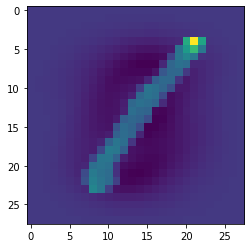

In [ ]:
plt.imshow(x[0].reshape(28,28))

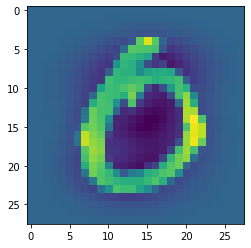

In [ ]:
plt.imshow(x[200].reshape(28,28))

###Model 1

In [ ]:
#model help from Knowledge center on YouTube
input=Input(shape=(784,))
encode=Dense(128,activation='relu')(input)
decode=Dense(784,activation='sigmoid')(encode)
autoEncode=Model(input,decode)
encoder=Model(input, encode)
inputEncode=Input(shape=(128,))
decodeLayer=autoEncode.layers[-1]
decoder=Model(inputEncode,decodeLayer(inputEncode))
autoEncode.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [ ]:
autoEncode.fit(x,x,epochs=50)

Epoch 1/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4719 - accuracy: 0.0056
Epoch 2/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.4551 - accuracy: 0.0058
Epoch 3/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4377 - accuracy: 0.0060
Epoch 4/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4196 - accuracy: 0.0063
Epoch 5/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.4010 - accuracy: 0.0065
Epoch 6/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3818 - accuracy: 0.0069
Epoch 7/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3621 - accuracy: 0.0071
Epoch 8/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3419 - accuracy: 0.0073
Epoch 9/50
1313/1313 [==============================] - 6s 4ms/step - loss: 0.3213 - accuracy: 0.0074
Epoch 10/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.300

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

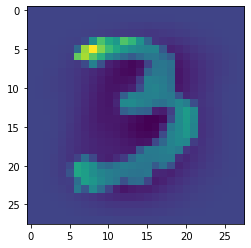

In [ ]:
for i in range(10):
  plt.imshow(x[i].reshape(28,28))

In [ ]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,252,20,0,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
test=StandardScaler().fit_transform(test)

In [ ]:
test.shape

(28000, 784)

In [ ]:
predictionEncode=encoder.predict(test)
predictionDecode=decoder.predict(predictionEncode)


In [ ]:
predictionDecode.shape

(28000, 784)

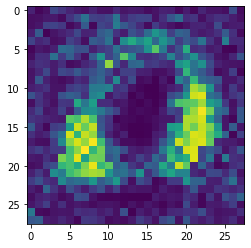

In [ ]:
plt.imshow(predictionDecode[0].reshape(28,28))

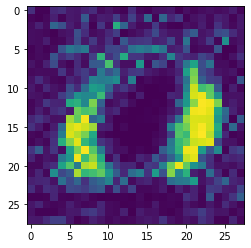

In [ ]:
plt.imshow(predictionDecode[1].reshape(28,28))

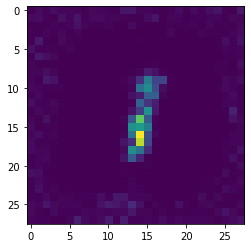

In [ ]:
plt.imshow(predictionDecode[2].reshape(28,28))

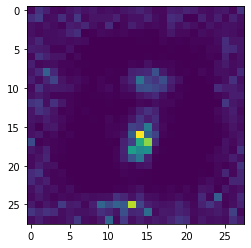

In [ ]:
plt.imshow(predictionDecode[3].reshape(28,28))

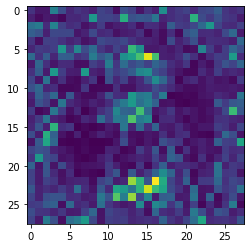

In [ ]:
plt.imshow(predictionDecode[10].reshape(28,28))

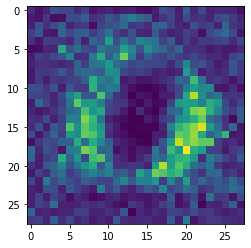

In [ ]:
plt.imshow(predictionDecode[100].reshape(28,28))

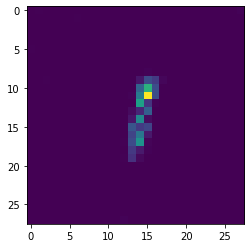

In [ ]:
plt.imshow(predictionDecode[200].reshape(28,28))

###Model 2

In [ ]:
input=Input(shape=(784,))
encode=Dense(256,activation='relu')(input)
decode=Dense(784,activation='sigmoid')(encode)
autoEncode=Model(input,decode)
encoder=Model(input, encode)
inputEncode=Input(shape=(256,))
decodeLayer=autoEncode.layers[-1]
decoder=Model(inputEncode,decodeLayer(inputEncode))
autoEncode.compile(optimizer='adadelta',loss='mse',metrics=['accuracy'])

In [ ]:
autoEncode.fit(x,x,epochs=35)

Epoch 1/35
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1710 - accuracy: 4.9593e-04
Epoch 2/35
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1810 - accuracy: 5.3407e-04
Epoch 3/35
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1598 - accuracy: 5.6896e-04
Epoch 4/35
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1507 - accuracy: 7.2329e-04
Epoch 5/35
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1276 - accuracy: 8.8476e-04
Epoch 6/35
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1615 - accuracy: 8.7900e-04
Epoch 7/35
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1411 - accuracy: 8.8313e-04
Epoch 8/35
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1238 - accuracy: 0.0010
Epoch 9/35
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1344 - accuracy: 7.0245e-04
Epoch 10/35
1313/1313 [===========================

In [ ]:
predictionEncode=encoder.predict(test)
predictionDecode=decoder.predict(predictionEncode)


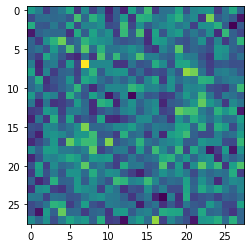

In [ ]:
plt.imshow(predictionDecode[0].reshape(28,28))

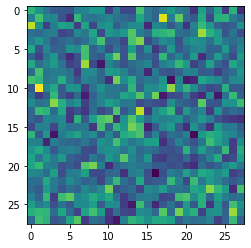

In [ ]:
plt.imshow(predictionDecode[2].reshape(28,28))

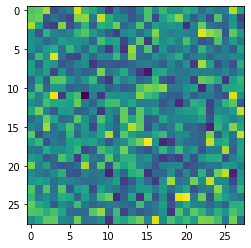

In [ ]:
plt.imshow(predictionDecode[200].reshape(28,28))

###Model 3

In [ ]:
input=Input(shape=(784,))
encode=Dense(256,activation='relu')(input)
decode=Dense(784,activation='sigmoid')(encode)
autoEncode=Model(input,decode)
encoder=Model(input, encode)
inputEncode=Input(shape=(256,))
decodeLayer=autoEncode.layers[-1]
decoder=Model(inputEncode,decodeLayer(inputEncode))
autoEncode.compile(optimizer='adadelta',loss='mse',metrics=['accuracy'])

In [ ]:
autoEncode.fit(x,x,epochs=50)

Epoch 1/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1933 - accuracy: 7.0898e-04
Epoch 2/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1522 - accuracy: 4.3610e-04
Epoch 3/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1430 - accuracy: 8.7405e-04
Epoch 4/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1751 - accuracy: 7.4718e-04
Epoch 5/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1553 - accuracy: 9.1907e-04
Epoch 6/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1404 - accuracy: 9.2748e-04
Epoch 7/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1577 - accuracy: 0.0012
Epoch 8/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1302 - accuracy: 0.0011
Epoch 9/50
1313/1313 [==============================] - 7s 5ms/step - loss: 1.1322 - accuracy: 9.3027e-04
Epoch 10/50
1313/1313 [==============================]

In [ ]:
predictionEncode=encoder.predict(test)
predictionDecode=decoder.predict(predictionEncode)


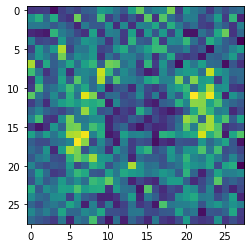

In [ ]:
plt.imshow(predictionDecode[1].reshape(28,28))

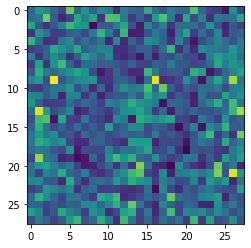

In [ ]:
plt.imshow(predictionDecode[200].reshape(28,28))

###Model 4

In [ ]:
input=Input(shape=(784,))
encode=Dense(32,activation='relu')(input)
decode=Dense(784,activation='sigmoid')(encode)
autoEncode=Model(input,decode)
encoder=Model(input, encode)
inputEncode=Input(shape=(32,))
decodeLayer=autoEncode.layers[-1]
decoder=Model(inputEncode,decodeLayer(inputEncode))
autoEncode.compile(optimizer='adadelta',loss='mse',metrics=['accuracy'])
autoEncode.fit(x,x,epochs=50)

Epoch 1/50
1313/1313 [==============================] - 3s 2ms/step - loss: 1.1703 - accuracy: 0.0019
Epoch 2/50
1313/1313 [==============================] - 2s 2ms/step - loss: 1.1566 - accuracy: 0.0016
Epoch 3/50
1313/1313 [==============================] - 2s 2ms/step - loss: 1.1695 - accuracy: 0.0016
Epoch 4/50
1313/1313 [==============================] - 2s 2ms/step - loss: 1.1461 - accuracy: 0.0017
Epoch 5/50
1313/1313 [==============================] - 3s 2ms/step - loss: 1.1529 - accuracy: 0.0018
Epoch 6/50
1313/1313 [==============================] - 3s 2ms/step - loss: 1.1667 - accuracy: 0.0018
Epoch 7/50
1313/1313 [==============================] - 3s 2ms/step - loss: 1.1269 - accuracy: 0.0016
Epoch 8/50
1313/1313 [==============================] - 2s 2ms/step - loss: 1.1605 - accuracy: 0.0016
Epoch 9/50
1313/1313 [==============================] - 3s 2ms/step - loss: 1.1516 - accuracy: 0.0014
Epoch 10/50
1313/1313 [==============================] - 2s 2ms/step - loss: 1.132

In [ ]:
predictionEncode=encoder.predict(test)
predictionDecode=decoder.predict(predictionEncode)

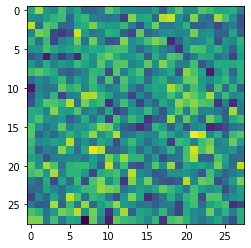

In [ ]:
plt.imshow(predictionDecode[1].reshape(28,28))

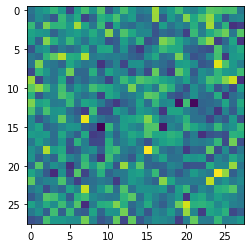

In [ ]:
plt.imshow(predictionDecode[200].reshape(28,28))

###Conclusion

Autoencoding as a way for a neural network to learn about data in an unsupervised manner. The input woiuld be the same as the output, and it learns to deconstruct it to reconstruct it. Throughout this assignment, I learned that the number of nodes in the Dense layers increasing is not as good as increasing the epochs. It may cause the model to learn more about the data in a negative, and could lead to overfitting. My model with less nodes but more epochs produced clearer results than my model with more nodes and less epochs. This way, the image was probably split up more, and meant more pizels for the model to sift through and learn about, which was detrimental in my experiments. Still, it needs a healthy balance of both to perform the autoencoding well, as too few nerons could also lead to a noisy picture. 